<a href="https://colab.research.google.com/github/LunaTic-Neon/2025-2-RL/blob/main/25_2_0924_%EA%B0%95%ED%99%94%ED%95%99%EC%8A%B5_4%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[[ 가치 반복 시작! ]]]
*** 가치 평가 [수렴까지 반복 횟수: 9] ***

*** 정책 셋업 완료 ***

가치 반복 (Value Iteration) 결과:
 [[ 6.38004755  6.82110269  7.28537125  7.774075    8.2885      7.774075
   7.28537125  6.82110269  6.38004755  5.96104518]
 [ 6.82110269  7.28537125  7.774075    8.2885      8.83        8.2885
   7.774075    7.28537125  6.82110269  6.38004755]
 [ 7.28537125  7.774075    8.2885      8.83        9.4         8.83
   8.2885      7.774075    7.28537125  6.82110269]
 [ 7.774075    8.2885      8.83        9.4        10.          9.4
   8.83        8.2885      7.774075    7.28537125]
 [ 8.2885      8.83        9.4        10.          0.         10.
   9.4         8.83        8.2885      7.774075  ]
 [ 7.774075    8.2885      8.83        9.4        10.          9.4
   8.83        8.2885      7.774075    8.2885    ]
 [ 7.28537125  7.774075    8.2885      8.83        9.4         8.83
   8.2885      7.774075    8.2885      8.83      ]
 [ 6.82110269  7.28537125  7.774075    8.2885      8.83        8.2885

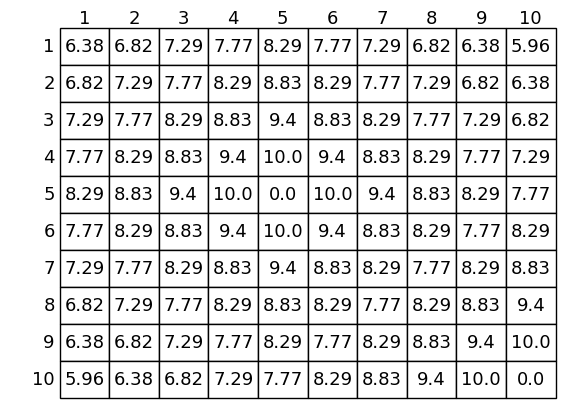

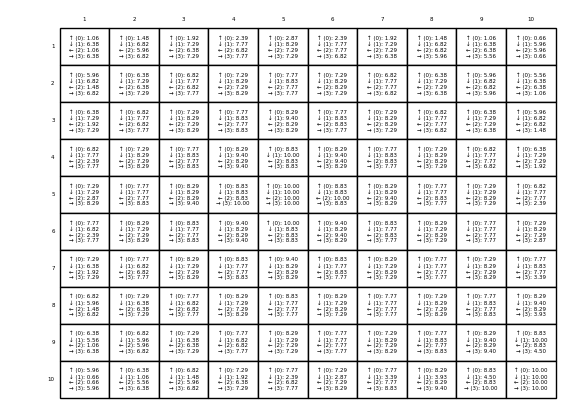

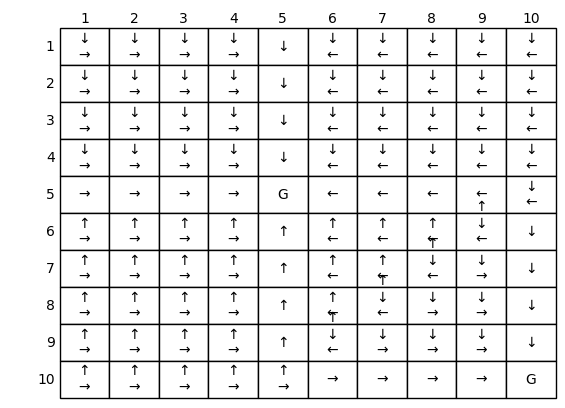

[[[ 정책 반복 시작! ]]]
*** 정책 평가 [수렴까지 반복 횟수: 221] ***
*** 정책 개선 [에러 값: 110.49896] ***
*** 정책의 안정(Stable) 여부: False, 반복 횟수: 1 ***

*** 정책 평가 [수렴까지 반복 횟수: 30] ***
*** 정책 개선 [에러 값: 72.32678] ***
*** 정책의 안정(Stable) 여부: False, 반복 횟수: 2 ***

*** 정책 평가 [수렴까지 반복 횟수: 86] ***
*** 정책 개선 [에러 값: 23.69074] ***
*** 정책의 안정(Stable) 여부: False, 반복 횟수: 3 ***

*** 정책 평가 [수렴까지 반복 횟수: 52] ***
*** 정책 개선 [에러 값: 13.08530] ***
*** 정책의 안정(Stable) 여부: False, 반복 횟수: 4 ***

*** 정책 평가 [수렴까지 반복 횟수: 58] ***
*** 정책 개선 [에러 값: 7.53336] ***
*** 정책의 안정(Stable) 여부: False, 반복 횟수: 5 ***

*** 정책 평가 [수렴까지 반복 횟수: 57] ***
*** 정책 개선 [에러 값: 5.14618] ***
*** 정책의 안정(Stable) 여부: False, 반복 횟수: 6 ***

*** 정책 평가 [수렴까지 반복 횟수: 54] ***
*** 정책 개선 [에러 값: 3.24805] ***
*** 정책의 안정(Stable) 여부: False, 반복 횟수: 7 ***

*** 정책 평가 [수렴까지 반복 횟수: 57] ***
*** 정책 개선 [에러 값: 1.88418] ***
*** 정책의 안정(Stable) 여부: False, 반복 횟수: 8 ***

*** 정책 평가 [수렴까지 반복 횟수: 55] ***
*** 정책 개선 [에러 값: 1.17371] ***
*** 정책의 안정(Stable) 여부: False, 반복 횟수: 9 ***

*** 정책 평가 [수렴까지 반복 횟수: 56] ***


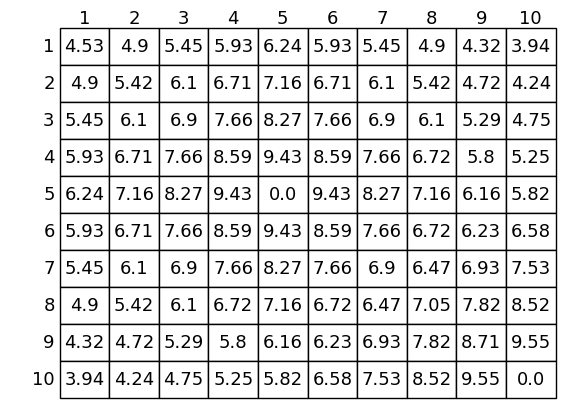

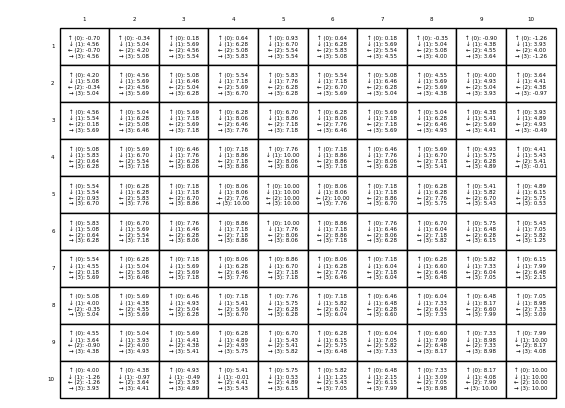

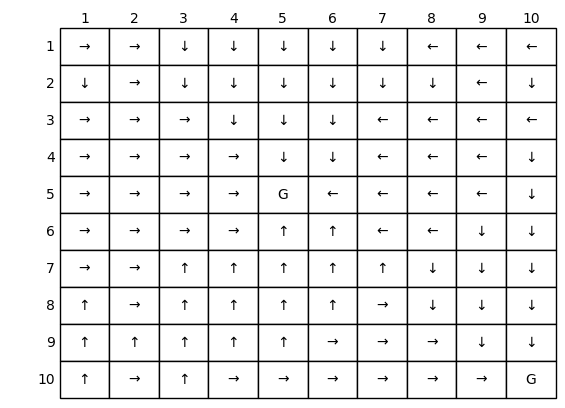

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.table import Table
import random
import time
import os

# GridWorld 클래스 (환경)
# source: GridWorld1.txt
class GridWorld():
    def __init__(
            self,
            height=5, width=5,
            start_state=(0, 0),
            terminal_states=[(4, 4)],
            transition_reward=0.0,
            terminal_reward=1.0,
            outward_reward=0.0,
            warm_hole_states=None
    ):
        self.__version__ = "0.0.1"
        self.HEIGHT = height
        self.WIDTH = width
        self.STATES = []
        self.num_states = self.WIDTH * self.HEIGHT

        for i in range(self.HEIGHT):
            for j in range(self.WIDTH):
                self.STATES.append((i, j))

        for state in terminal_states:
            if state in self.STATES:
                self.STATES.remove(state)

        self.current_state = None
        self.ACTION_UP = 0
        self.ACTION_DOWN = 1
        self.ACTION_LEFT = 2
        self.ACTION_RIGHT = 3
        self.ACTIONS = [
            self.ACTION_UP,
            self.ACTION_DOWN,
            self.ACTION_LEFT,
            self.ACTION_RIGHT
        ]
        self.ACTION_SYMBOLS = ["↑", "↓", "←", "→"]
        self.NUM_ACTIONS = len(self.ACTIONS)
        self.START_STATE = start_state
        self.TERMINAL_STATES = terminal_states
        self.WARM_HOLE_STATES = warm_hole_states
        self.transition_reward = transition_reward
        self.terminal_reward = terminal_reward
        self.outward_reward = outward_reward

    def reset(self):
        self.current_state = self.START_STATE
        return self.current_state

    def moveto(self, state):
        self.current_state = state

    def is_warm_hole_state(self, state):
        i, j = state
        if self.WARM_HOLE_STATES is not None and len(self.WARM_HOLE_STATES) > 0:
            for warm_hole_info in self.WARM_HOLE_STATES:
                warm_hole_state = warm_hole_info[0]
                if i == warm_hole_state[0] and j == warm_hole_state[1]:
                    return True
        return False

    def get_next_state_warm_hole(self, state):
        i, j = state
        next_state = None
        for warm_hole_info in self.WARM_HOLE_STATES:
            warm_hole_state = warm_hole_info[0]
            warm_hole_prime_state = warm_hole_info[1]
            if i == warm_hole_state[0] and j == warm_hole_state[1]:
                next_state = warm_hole_prime_state
                break
        return next_state

    def get_reward_warm_hole(self, state):
        i, j = state
        reward = None
        for warm_hole_info in self.WARM_HOLE_STATES:
            warm_hole_state = warm_hole_info[0]
            warm_hole_reward = warm_hole_info[2]
            if i == warm_hole_state[0] and j == warm_hole_state[1]:
                reward = warm_hole_reward
                break
        return reward

    def get_next_state(self, state, action):
        i, j = state
        if self.is_warm_hole_state(state):
            next_state = self.get_next_state_warm_hole(state)
            next_i, next_j = next_state
        elif (i, j) in self.TERMINAL_STATES:
            next_i, next_j = i, j
        else:
            if action == self.ACTION_UP:
                next_i = max(i - 1, 0)
                next_j = j
            elif action == self.ACTION_DOWN:
                next_i = min(i + 1, self.HEIGHT - 1)
                next_j = j
            elif action == self.ACTION_LEFT:
                next_i = i
                next_j = max(j - 1, 0)
            elif action == self.ACTION_RIGHT:
                next_i = i
                next_j = min(j + 1, self.WIDTH - 1)
            else:
                raise ValueError()
        return next_i, next_j

    def get_reward(self, state, next_state):
        i, j = state
        next_i, next_j = next_state
        if self.is_warm_hole_state(state):
            reward = self.get_reward_warm_hole(state)
        else:
            if (next_i, next_j) in self.TERMINAL_STATES:
                reward = self.terminal_reward
            else:
                if i == next_i and j == next_j:
                    reward = self.outward_reward
                else:
                    reward = self.transition_reward
        return reward

    def get_state_action_probability(self, state, action):
        next_i, next_j = self.get_next_state(state, action)
        reward = self.get_reward(state, (next_i, next_j))
        transition_prob = 1.0
        return (next_i, next_j), reward, transition_prob

    def step(self, action):
        next_i, next_j = self.get_next_state(
            state=self.current_state, action=action
        )
        reward = self.get_reward(self.current_state, (next_i, next_j))
        self.current_state = (next_i, next_j)
        if self.current_state in self.TERMINAL_STATES:
            done = True
        else:
            done = False
        return (next_i, next_j), reward, done, None

    def render(self, mode='human'):
        print(self.__str__())

    def get_random_action(self):
        return random.choice(self.ACTIONS)

    def __str__(self):
        gridworld_str = ""
        for i in range(self.HEIGHT):
            gridworld_str += "-------------------------------\n"
            for j in range(self.WIDTH):
                if self.current_state and self.current_state[0] == i and self.current_state[1] == j:
                    gridworld_str += "| * "
                elif (i, j) == self.START_STATE:
                    gridworld_str += "| S "
                elif (i, j) in self.TERMINAL_STATES:
                    gridworld_str += "| G "
                elif self.WARM_HOLE_STATES and (i, j) in [state[0] for state in self.WARM_HOLE_STATES]:
                    gridworld_str += "| W "
                else:
                    gridworld_str += "|   "
            gridworld_str += "|\n"
            for j in range(self.WIDTH):
                gridworld_str += "|({0},{1})".format(i, j)
            gridworld_str += "|\n"
        gridworld_str += "-------------------------------\n"
        return gridworld_str

# 시각화 함수
# source: GridWorld1_2.txt, GridWorld1_3.txt, GridWorld1_4.txt
def draw_grid_world_state_values_image(state_values, GRID_HEIGHT, GRID_WIDTH):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    table = Table(ax, bbox=[0, 0, 1, 1])
    nrows, ncols = GRID_HEIGHT, GRID_WIDTH
    width, height = 1.0 / ncols, 1.0 / nrows

    for i in range(GRID_HEIGHT):
        for j in range(GRID_WIDTH):
            table.add_cell(
                i, j, width, height,
                text=np.round(state_values[i][j], decimals=2),
                loc='center', facecolor='white'
            )
    for i in range(len(state_values)):
        table.add_cell(
            i, -1, width, height,
            text=i+1,
            loc='right', edgecolor='none', facecolor='none'
        )
        table.add_cell(
            -1, i, width, height/2,
            text=i+1,
            loc='center', edgecolor='none', facecolor='none'
        )
    for key, cell in table.get_celld().items():
         cell.get_text().set_fontsize(20)
    ax.add_table(table)
    plt.show()
    plt.close()

def draw_grid_world_action_values_image(action_values, GRID_HEIGHT, GRID_WIDTH, NUM_ACTIONS, ACTION_SYMBOLS):
    action_str_values = []
    for i in range(GRID_HEIGHT):
        action_str_values.append([])
        for j in range(GRID_WIDTH):
            str_values = []
            for action in range(NUM_ACTIONS):
                str_values.append("{0} ({1}): {2:.2f}".format(
                    ACTION_SYMBOLS[action],
                    action,
                    np.round(action_values[i, j, action], decimals=2)
                ))
            action_str_values[i].append("\n".join(str_values))

    fig, ax = plt.subplots()
    ax.set_axis_off()
    table = Table(ax, bbox=[0, 0, 1, 1])
    nrows, ncols = GRID_HEIGHT, GRID_WIDTH
    width, height = 1.0 / ncols, 1.0 / nrows

    for i in range(GRID_HEIGHT):
        for j in range(GRID_WIDTH):
            table.add_cell(
                i, j, width, height,
                text=action_str_values[i][j],
                loc='center', facecolor='white'
            )
    for i in range(len(action_str_values)):
        table.add_cell(
            i, -1, width, height,
            text=i+1,
            loc='right', edgecolor='none', facecolor='none')
        table.add_cell(
            -1, i, width, height/2,
            text=i+1, loc='center', edgecolor='none', facecolor='none')

    for key, cell in table.get_celld().items():
         cell.get_text().set_fontsize(10)

    ax.add_table(table)
    plt.show()
    plt.close()

def draw_grid_world_optimal_policy_image(policy, GRID_HEIGHT, GRID_WIDTH, ACTION_SYMBOLS, TERMINAL_STATES=None):
    action_str_values = []
    for i in range(GRID_HEIGHT):
        action_str_values.append([])
        for j in range(GRID_WIDTH):
            if TERMINAL_STATES and (i, j) in TERMINAL_STATES:
                action_str_values[i].append("G")
                continue
            str_values = []
            if (i, j) in policy:
                for action in policy[(i, j)]:
                    str_values.append("{0}".format(ACTION_SYMBOLS[action]))
            action_str_values[i].append("\n".join(str_values))

    fig, ax = plt.subplots()
    ax.set_axis_off()
    table = Table(ax, bbox=[0, 0, 1, 1])
    nrows, ncols = GRID_HEIGHT, GRID_WIDTH
    width, height = 1.0 / ncols, 1.0 / nrows

    for i in range(GRID_HEIGHT):
        for j in range(GRID_WIDTH):
            table.add_cell(
                i, j, width, height,
                text=action_str_values[i][j],
                loc='center', facecolor='white'
            )
    for i in range(len(action_str_values)):
        table.add_cell(
            i, -1, width, height,
            text=i+1, loc='right', edgecolor='none', facecolor='none')
        table.add_cell(
            -1, i, width, height/2,
            text=i+1, loc='center', edgecolor='none', facecolor='none')

    for key, cell in table.get_celld().items():
         cell.get_text().set_fontsize(10)

    ax.add_table(table)
    plt.show()
    plt.close()

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

# Value Iteration 클래스
# source: ValueIteration.txt
class ValueIteration:
    def __init__(self, env):
        self.env = env
        self.state_values = None
        self.policy = np.empty([self.env.HEIGHT, self.env.WIDTH, self.env.NUM_ACTIONS])

        for i in range(self.env.HEIGHT):
            for j in range(self.env.WIDTH):
                for action in self.env.ACTIONS:
                    if (i, j) in self.env.TERMINAL_STATES:
                        self.policy[i][j][action] = 0.00
                    else:
                        self.policy[i][j][action] = 1.0 / self.env.NUM_ACTIONS

    def value_evaluation(self):
        state_values = np.zeros((self.env.HEIGHT, self.env.WIDTH))
        iter_num = 0
        while True:
            old_state_values = state_values.copy()
            for i in range(self.env.HEIGHT):
                for j in range(self.env.WIDTH):
                    if (i, j) in self.env.TERMINAL_STATES:
                        state_values[i][j] = 0.0
                    else:
                        values = []
                        for action in self.env.ACTIONS:
                            (next_i, next_j), reward, prob = self.env.get_state_action_probability(
                                state=(i, j), action=action
                            )
                            values.append(
                                prob * (reward + self.env.DISCOUNT_RATE * state_values[next_i, next_j])
                            )
                        state_values[i][j] = np.max(values)
            iter_num += 1
            delta_value = np.sum(np.absolute(old_state_values - state_values))
            if delta_value < self.env.THETA_1:
                break
        self.state_values = state_values
        return iter_num

    def policy_setup(self):
        for i in range(self.env.HEIGHT):
            for j in range(self.env.WIDTH):
                if (i, j) in self.env.TERMINAL_STATES:
                    for action in self.env.ACTIONS:
                        self.policy[i][j][action] = 0.0
                else:
                    q_func = []
                    for action in self.env.ACTIONS:
                        (next_i, next_j), reward, prob = self.env.get_state_action_probability(
                            state=(i, j), action=action
                        )
                        q_func.append(
                            prob * (reward + self.env.DISCOUNT_RATE * self.state_values[next_i, next_j])
                        )
                    self.policy[i][j] = softmax(np.array(q_func))

    def start_iteration(self):
        print("[[[ 가치 반복 시작! ]]]")
        iter_num_policy_evaluation = self.value_evaluation()
        print("*** 가치 평가 [수렴까지 반복 횟수: {0}] ***".format(iter_num_policy_evaluation))
        print()
        self.policy_setup()
        print("*** 정책 셋업 완료 ***")
        print()
        return self.state_values, self.policy

    def calculate_optimal_policy(self):
        optimal_policy = dict()
        for i in range(self.env.HEIGHT):
            for j in range(self.env.WIDTH):
                indices = [idx for idx, value_ in enumerate(self.policy[i, j, :]) if value_ == np.max(self.policy[i, j, :])]
                optimal_policy[(i, j)] = indices
        return optimal_policy

    def calculate_grid_world_optimal_action_values(self):
        action_value_function = np.zeros(
            (self.env.HEIGHT, self.env.WIDTH, self.env.NUM_ACTIONS)
        )
        for i in range(self.env.HEIGHT):
            for j in range(self.env.WIDTH):
                for action in self.env.ACTIONS:
                    (next_i, next_j), reward, prob = self.env.get_state_action_probability(
                        state=(i, j), action=action
                    )
                    action_value_function[i, j, action] = prob * (reward + self.env.DISCOUNT_RATE * self.state_values[next_i, next_j])
        return action_value_function

# Policy Iteration 클래스
# source: PolicyIteration.txt
class PolicyIteration:
    def __init__(self, env):
        self.env = env
        self.state_values = None
        self.policy = np.empty([self.env.HEIGHT, self.env.WIDTH, self.env.NUM_ACTIONS])
        for i in range(self.env.HEIGHT):
            for j in range(self.env.WIDTH):
                for action in self.env.ACTIONS:
                    if (i, j) in self.env.TERMINAL_STATES:
                        self.policy[i][j][action] = 0.00
                    else:
                        self.policy[i][j][action] = 1.0 / self.env.NUM_ACTIONS

    def policy_evaluation(self):
        state_values = np.zeros((self.env.HEIGHT, self.env.WIDTH))
        iter_num = 0
        while True:
            old_state_values = state_values.copy()
            for i in range(self.env.HEIGHT):
                for j in range(self.env.WIDTH):
                    if (i, j) in self.env.TERMINAL_STATES:
                        state_values[i][j] = 0.0
                    else:
                        values = []
                        for action in self.env.ACTIONS:
                            (next_i, next_j), reward, prob = self.env.get_state_action_probability(
                                state=(i, j), action=action
                            )
                            values.append(
                                self.policy[i, j, action] * prob * (reward + self.env.DISCOUNT_RATE * old_state_values[next_i, next_j])
                            )
                        state_values[i][j] = np.sum(values)
            iter_num += 1
            delta_value = np.sum(np.absolute(old_state_values - state_values))
            if delta_value < self.env.THETA_1:
                break
        self.state_values = state_values
        return iter_num

    def policy_improvement(self):
        new_policy = np.empty([self.env.HEIGHT, self.env.WIDTH, self.env.NUM_ACTIONS])
        is_policy_stable = True
        for i in range(self.env.HEIGHT):
            for j in range(self.env.WIDTH):
                if (i, j) in self.env.TERMINAL_STATES:
                    for action in self.env.ACTIONS:
                        new_policy[i][j][action] = 0.00
                else:
                    q_func = []
                    for action in self.env.ACTIONS:
                        (next_i, next_j), reward, prob = self.env.get_state_action_probability(
                            state=(i, j), action=action
                        )
                        q_func.append(
                            prob * (reward + self.env.DISCOUNT_RATE * self.state_values[next_i, next_j])
                        )
                    new_policy[i, j, :] = softmax(np.array(q_func))
        error = np.sum(np.absolute(self.policy - new_policy))
        if error > self.env.THETA_2:
            is_policy_stable = False
        self.policy = new_policy
        return is_policy_stable, error

    def start_iteration(self):
        iter_num = 0
        is_policy_stable = False
        print("[[[ 정책 반복 시작! ]]]")
        while not is_policy_stable:
            iter_num_policy_evaluation = self.policy_evaluation()
            print("*** 정책 평가 [수렴까지 반복 횟수: {0}] ***".format(iter_num_policy_evaluation))
            is_policy_stable, error = self.policy_improvement()
            print("*** 정책 개선 [에러 값: {0:7.5f}] ***".format(error))
            iter_num += 1
            print("*** 정책의 안정(Stable) 여부: {0}, 반복 횟수: {1} ***\n".format(
                is_policy_stable, iter_num
            ))
        print("[[[ 정책 반복 종료! ]]]\n\n")
        return self.state_values, self.policy

    def calculate_optimal_policy(self):
        optimal_policy = dict()
        for i in range(self.env.HEIGHT):
            for j in range(self.env.WIDTH):
                indices = [idx for idx, value_ in enumerate(self.policy[i, j, :]) if value_ == np.max(self.policy[i, j, :])]
                optimal_policy[(i, j)] = indices
        return optimal_policy

    def calculate_grid_world_optimal_action_values(self):
        action_value_function = np.zeros((self.env.HEIGHT, self.env.WIDTH, self.env.NUM_ACTIONS))
        for i in range(self.env.HEIGHT):
            for j in range(self.env.WIDTH):
                for action in self.env.ACTIONS:
                    (next_i, next_j), reward, prob = self.env.get_state_action_probability(
                        state=(i, j), action=action
                    )
                    action_value_function[i, j, action] = prob * (reward + self.env.DISCOUNT_RATE * self.state_values[next_i, next_j])
        return action_value_function


# 메인 실행 함수
def main():
    # Value Iteration 실행
    GRID_HEIGHT_VI = 10
    GRID_WIDTH_VI = 10
    TERMINAL_STATES_VI = [(4, 4), (GRID_HEIGHT_VI - 1, GRID_WIDTH_VI - 1)]  # Change 1

    env_vi = GridWorld(
        height=GRID_HEIGHT_VI,
        width=GRID_WIDTH_VI,
        start_state=(0, 0),
        terminal_states=TERMINAL_STATES_VI,
        transition_reward=-0.1,
        terminal_reward=10.0,
        outward_reward=-5.0
    )
    env_vi.DISCOUNT_RATE = 0.95
    env_vi.THETA_1 = 0.0001
    env_vi.reset()
    VI = ValueIteration(env_vi)
    state_values_vi, policy_vi = VI.start_iteration()
    print("가치 반복 (Value Iteration) 결과:\n", state_values_vi)
    draw_grid_world_state_values_image(state_values_vi, GRID_HEIGHT_VI, GRID_WIDTH_VI)
    draw_grid_world_action_values_image(
        VI.calculate_grid_world_optimal_action_values(),
        GRID_HEIGHT_VI, GRID_WIDTH_VI,
        env_vi.NUM_ACTIONS, env_vi.ACTION_SYMBOLS
    )
    draw_grid_world_optimal_policy_image(
        VI.calculate_optimal_policy(),
        GRID_HEIGHT_VI, GRID_WIDTH_VI, env_vi.ACTION_SYMBOLS, TERMINAL_STATES_VI
    )

    # Policy Iteration 실행
    GRID_HEIGHT_PI = 10
    GRID_WIDTH_PI = 10
    TERMINAL_STATES_PI = [(4, 4), (GRID_HEIGHT_PI - 1, GRID_WIDTH_PI - 1)]  # Change 1

    env_pi = GridWorld(
        height=GRID_HEIGHT_PI,
        width=GRID_WIDTH_PI,
        start_state=(0, 0),
        terminal_states=TERMINAL_STATES_PI,
        transition_reward=-0.1,
        terminal_reward=10.0,
        outward_reward=-5.0
    )
    env_pi.DISCOUNT_RATE = 0.95
    env_pi.THETA_1 = 0.0001
    env_pi.THETA_2 = 0.0001
    env_pi.reset()
    PI = PolicyIteration(env_pi)
    state_values_pi, policy_pi = PI.start_iteration()
    print("정책 반복 (Policy Iteration) 결과:\n", state_values_pi)
    draw_grid_world_state_values_image(state_values_pi, GRID_HEIGHT_PI, GRID_WIDTH_PI)
    draw_grid_world_action_values_image(
        PI.calculate_grid_world_optimal_action_values(),
        GRID_HEIGHT_PI, GRID_WIDTH_PI, env_pi.NUM_ACTIONS, env_pi.ACTION_SYMBOLS
    )
    draw_grid_world_optimal_policy_image(
        PI.calculate_optimal_policy(),
        GRID_HEIGHT_PI, GRID_WIDTH_PI, env_pi.ACTION_SYMBOLS, TERMINAL_STATES_PI
    )

if __name__ == '__main__':
    main()

변경사항
1. 중간 목표(5, 5) 추가  
에이전트가 시작 지점에서 더 가까운 (5, 5) 지점으로 먼저 도달하는 경향을 보임.

2. 전이 보상 (transition_reward) 변경  
transition_reward를 -1.0에서 -0.1로 변경. 이 값이 커지면 에이전트가 각 단계에서 받는 벌점이 줄어들면서 가능한 한 빠르게 목표에 도달하려는 경향이 더 강해짐.

3. 종료 보상 (terminal_reward) 변경  
terminal_reward를 -1.0에서 10.0으로 변경. 강화 학습의 목표는 보상을 최대화하는 것이므로 도착 지점에 큰 양의 보상을 설정해야 에이전트가 그곳에 도달하도록 명확하게 학습함.

4. 경계 이탈 보상 (outward_reward) 변경  
outward_reward를 -1.0에서 -5.0으로 변경. 그리드 밖으로 이동하려는 행동에 더 큰 벌점을 부여해 에이전트가 벽에 부딪히는 비효율적인 행동을 학습하지 않도록 만듦. 이렇게 하면 벽을 따라가는 불필요한 움직임을 줄여 더 깔끔한 정책을 얻을 수 있음.

